In [51]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
from astropy import units as u

from load_mcxc_data import load_clusters
from equilibrium_functions import equil, radiative_cooling_rate, dm_cooling_rate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
clusters, variances=load_clusters(10, dataset='REFLEX')

In [43]:
[c.z for c in clusters]

[<Quantity 1.1326 redshift>,
 <Quantity 0.7388 redshift>,
 <Quantity 0.8233 redshift>,
 <Quantity 0.9486 redshift>,
 <Quantity 0.8807 redshift>,
 <Quantity 0.8883 redshift>,
 <Quantity 1.0117 redshift>,
 <Quantity 1.2359 redshift>,
 <Quantity 0.6888 redshift>,
 <Quantity 0.7883 redshift>]

In [44]:
[c.mass.to(u.Msun) for c in clusters]

[<Quantity 5.2188e+14 solMass>,
 <Quantity 1.2016e+14 solMass>,
 <Quantity 1.7342e+14 solMass>,
 <Quantity 2.7122e+14 solMass>,
 <Quantity 2.0611e+14 solMass>,
 <Quantity 2.1818e+14 solMass>,
 <Quantity 3.4455e+14 solMass>,
 <Quantity 7.3614e+14 solMass>,
 <Quantity 9.884e+13 solMass>,
 <Quantity 1.5291e+14 solMass>]

In [45]:
[c.eff_agn_heating_rate for c in clusters]

[<Quantity [2.35232317e+43] erg / s>,
 <Quantity [1.85389203e+42] erg / s>,
 <Quantity [3.4973682e+42] erg / s>,
 <Quantity [7.58134605e+42] erg / s>,
 <Quantity [4.71510258e+42] erg / s>,
 <Quantity [5.20294949e+42] erg / s>,
 <Quantity [1.14695444e+43] erg / s>,
 <Quantity [4.2652184e+43] erg / s>,
 <Quantity [1.32231041e+42] erg / s>,
 <Quantity [2.81302677e+42] erg / s>]

/var/folders/99/vfh56jrs1nqcj8zqtcs5fkv40000gn/T/ipykernel_36166/2289878207.py:8: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.scatter(np.log10(cls.baryon_temp.value),0, color='red', label='actual cluster temperature')


3.158822769874261e-06 GeV


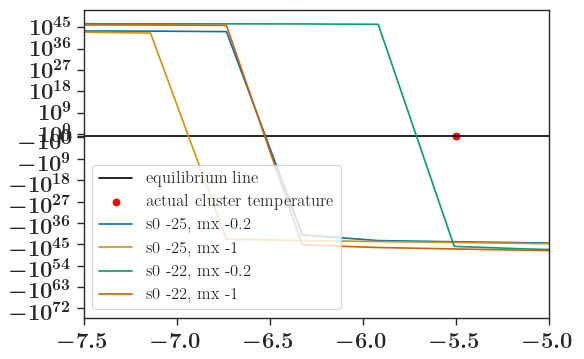

In [67]:
log_Tbs=np.linspace(-10, 10)
cls=clusters[3]

plt.yscale('symlog')
plt.xlim(-7.5,-5)

plt.plot([-10,10], [0,0], color='black', label='equilibrium line')
plt.scatter(np.log10(cls.baryon_temp.value),0, color='red', label='actual cluster temperature')
plt.plot(log_Tbs, equil(log_Tbs, cls, -25, -0.2), label='s0 -25, mx -0.2')
plt.plot(log_Tbs, equil(log_Tbs, cls, -25, -1), label='s0 -25, mx -1')
plt.plot(log_Tbs, equil(log_Tbs, cls, -22, -0.2), label='s0 -22, mx -0.2')
plt.plot(log_Tbs, equil(log_Tbs, cls, -22, -1), label='s0 -22, mx -1')


plt.legend(loc='lower left')
print(cls.baryon_temp)

In [69]:
cls=clusters[3]
print('agn heating rate', cls.eff_agn_heating_rate) 
print('radiative cooling rate', cls.radiative_cooling_rate())
s0=10**-30 *u.cm**2
m_chi=10**-2 *u.GeV
print('dm cooling rate', dm_cooling_rate(cls.baryon_temp, cls, s0, m_chi))

print('total heating rate', cls.eff_agn_heating_rate 
      - cls.radiative_cooling_rate() 
      - dm_cooling_rate(cls.baryon_temp, cls, s0, m_chi))

agn heating rate [7.58134605e+42] erg / s
radiative cooling rate 8.489505999829925e+43 erg / s
dm cooling rate 1.2887953340109696e+39 erg / s
total heating rate [-7.73150027e+43] erg / s


/var/folders/99/vfh56jrs1nqcj8zqtcs5fkv40000gn/T/ipykernel_36166/2016912091.py:8: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.scatter(np.log10(cls.baryon_temp.value),0, color='red', label='actual cluster temperature')


<Quantity 6.06049721e-06 GeV>

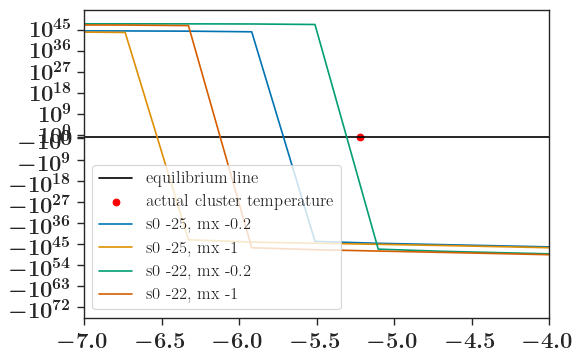

In [71]:
log_Tbs=np.linspace(-10, 10)
cls=clusters[7]

plt.yscale('symlog')
plt.xlim(-7,-4)

plt.plot([-10,10], [0,0], color='black', label='equilibrium line')
plt.scatter(np.log10(cls.baryon_temp.value),0, color='red', label='actual cluster temperature')
#plt.plot(log_Tbs, equil(log_Tbs, cls, -25, -0.2), label='s0 -25, mx -0.2')
#plt.plot(log_Tbs, equil(log_Tbs, cls, -25, -1), label='s0 -25, mx -1')
plt.plot(log_Tbs, equil(log_Tbs, cls, -25, -0.2), label='s0 -25, mx -0.2')
plt.plot(log_Tbs, equil(log_Tbs, cls, -25, -1), label='s0 -25, mx -1')
plt.plot(log_Tbs, equil(log_Tbs, cls, -22, -0.2), label='s0 -22, mx -0.2')
plt.plot(log_Tbs, equil(log_Tbs, cls, -22, -1), label='s0 -22, mx -1')


plt.legend(loc='lower left')
cls.baryon_temp

In [88]:
cls=clusters[7]
print('agn heating rate', cls.eff_agn_heating_rate) 
print('radiative cooling rate', cls.timescales.radiative_cooling_rate())
s0=10**-30 *u.cm**2
m_chi=10**-2 *u.GeV
print('dm cooling rate', dm_cooling_rate(cls.baryon_temp, cls, s0, m_chi))

print('total heating rate', cls.eff_agn_heating_rate 
      - cls.timescales.radiative_cooling_rate() 
      - dm_cooling_rate(cls.baryon_temp, cls, s0, m_chi))

agn heating rate [4.2652184e+43] erg / s
radiative cooling rate 3.916974029717987e+44 erg / s
dm cooling rate 1.1661322957085128e+40 erg / s
total heating rate [-3.4905688e+44] erg / s


In [89]:
clusters[7].L500.to(u.erg/u.s)

<Quantity 1.1818114e+45 erg / s>

In [91]:
clusters[7].timescales.n_e

<Quantity 1.10670007e+70 1 / Mpc3>

In [92]:
cls.bh_mass.to(u.Msun)

<Quantity 1.27372297e+11 solMass>

In [96]:
#print(cls.bh_mass)
print(((cls.bh_mass)/(10**9.5 * u.Msun) * 1e44 *u.erg/u.s).to(u.erg/u.s))
print(cls.injected_energy(0.3)) 
print(cls.injected_energy(0.1))

4.0278656800688287e+45 erg / s
5.099127175034964e+45 erg / s
7.675082516619156e+44 erg / s


In [82]:
print(cls.bh_mass)
print((10**9.5 * (1.25*cls.m500)/(1e14*u.Msun))**1.5)

2.0346097786797524e+45 kg
4.963701364557235e-06 1e+21


In [95]:
print(cls.bh_mass.to(u.kg))

2.5326833177793515e+41 kg
